# 2.5: World Population (Projecting Growth)

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

In the previous notebook we developed a quadratic model of world
population growth from 1950 to 2016. It is a simple model, but it fits
the data well and the mechanisms it's based on are plausible.  This has served one purpose of modeling: we have a better understanding of some of the "rules" that (seem to) govern this system.  The idea of *carrying capacity*, for instance, helps us see that limited resources might slow down or reverse future growth.

Now that we've found a plausible model, we can move on to one of the other aims of modeling: predicting future behavior.  In this notebook, we'll use the quadratic model to generate projections of future growth, and compare our results to projections from actual
demographers.

<br>

---

Once again, we'll go ahead and download the population data and functions we'll need:

In [6]:
#@title
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')
download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/chap02.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
from ModSimPy_Functions.chap02 import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/chap02.py


In [2]:
filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/World_population_estimates.html'
tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
un = table2.un / 1e9
census = table2.census / 1e9

def plot_estimates():
    census.plot(style=':', label='US Census',legend=True)
    un.plot(style='--', label='UN DESA', xlabel='Year', 
             ylabel='World population (billion)',
           legend=True)

---

## Examining Future Growth

### Generating a projection

Let's run the quadratic model, extending the results until 2100, and see how our projections compare to the professionals'.

Here's the quadratic growth function again.

In [3]:
def growth_func_quad(t, pop, system):
    return system['alpha'] * pop + system['beta'] * pop**2

And here are the system parameters.

In [7]:
t_0 = census.index[0]
p_0 = census[t_0]

system = dict(t_0 = t_0,
                p_0 = p_0,
                alpha = 25 / 1000,
                beta = -1.8 / 1000,
                t_end = 2100)

With `t_end=2100`, we can generate the projection by calling `run_simulation` the usual way.

In [8]:
results = run_simulation(system, growth_func_quad)

Here are the last few values in the results.

In [9]:
pd.DataFrame(results.tail())

,0
2096,12.462519
2097,12.494516
2098,12.525875
2099,12.556607
2100,12.586719


Here's what the results look like.

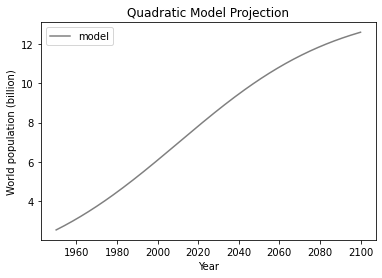

In [10]:
results.plot(color='gray', label='model',xlabel='Year', 
         ylabel='World population (billion)',
         title='Quadratic Model Projection',
            legend=True);

According to the model, population growth will slow gradually after 2020, approaching 12.6 billion by 2100.

### Projections vs. Predictions

We are using the word "projection" deliberately, rather than
"prediction":  

- "Prediction" implies "this is what we should reasonably expect to happen, at
least approximately"
- "projection" implies "if this
model is a good description of what is happening in this
system, and if nothing in the future causes the system parameters to change, this is what would happen."

So you can see that "projection" is a more careful word, with a stronger sense of a model's limitations.

Using "projection" leaves open the possibility that there are important things in the real world that are not captured in the model. It also suggests that, even if the model is good, the parameters we estimate based on the past might be different in the future.

The quadratic model we've been working with is based on the assumption
that population growth is limited by the availability of resources; in
that scenario, as the population approaches carrying capacity, birth
rates fall and death rates rise because resources become scarce.

If that assumption is valid, we might be able to use actual population
growth to estimate carrying capacity, provided we observe the
transition into the population range where the growth rate starts to fall.

But in the case of world population growth, those conditions don't
apply. Over the last 50 years, the net growth rate has leveled off, but not yet started to fall, so we don't have enough data to make a credible estimate of carrying capacity. And resource limitations are probably *not* the primary reason growth has slowed. As evidence, consider:

-   First, the death rate is not increasing; rather, it has declined
    from 1.9% in 1950 to 0.8% now.
    So the decrease in net growth is due entirely to declining birth
    rates.

-   Second, the relationship between resources and birth rate is the
    opposite of what the model assumes; as nations develop and people
    become more wealthy, birth rates tend to fall.

For these reasons, we should not take too seriously the idea that this model can estimate
carrying capacity. 

But the predictions of a model can be credible even
if the assumptions of the model are not strictly true. For example,
population growth might behave *as if* it is resource limited, even if
the actual mechanism is something else.

In fact, demographers who study population growth often use models
similar to ours. In the next section, we'll compare our projections to
theirs.

### Comparing Projections

From the same Wikipedia page where we got the past population estimates, we'll read `table3`, which contains predictions for population growth over the next 50-100 years, generated by the U.S. Census, U.N. DESA, and the Population Reference Bureau.

In [11]:
table3 = tables[3]
table3.head()

,United States Census Bureau (2015)[28],Population Reference Bureau (1973-2015)[15],United Nations Department of Economic and Social Affairs (2015)[16]
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


Some values are `NaN`, which indicates missing data, because some organizations did not publish projections for some years.

The column names are long strings; for convenience, I'll replace them with abbreviations.

In [12]:
table3.columns = ['census', 'prb', 'un']

The following function plots projections from the U.N. DESA and U.S. Census.  It uses a function called `dropna` to remove the `NaN` values from each series before plotting it.

In [13]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census.dropna() / 1e9
    un_proj = table.un.dropna() / 1e9
    
    census_proj.plot(style=':', label='US Census',legend=True)
    un_proj.plot(style='--', label='UN DESA',xlabel='Year', 
             ylabel='World population (billion)',legend=True)

Here are the professional projections compared to the results of the quadratic model.

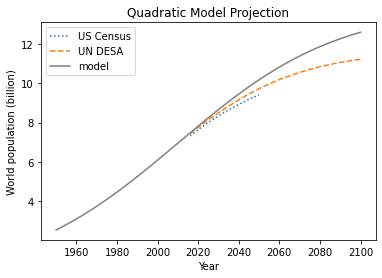

In [15]:
plot_projections(table3)
results.plot(color='gray', label='model',
             title='Quadratic Model Projection',
            legend=True);

The U.N. DESA expects the world population to reach 11 billion around 2100, and then level off.
Projections by U.S. Census are a little lower, and they only go until 2050.

Real demographers expect world population to grow more slowly than our model, probably because their models are broken down by region and country, where conditions are different, and they take into account expected economic development.

Nevertheless, their projections are qualitatively similar to ours, and
theirs differ from each other almost as much as they differ from ours.
So the results from the model, simple as it is, are not entirely unreasonable.

If you are interested in some of the factors that go into the professional predictions, you might like this video by Hans Rosling about the demographic changes we expect this century: <https://www.youtube.com/watch?v=ezVk1ahRF78>.

### Basing a projection on changes in growth rate

 The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate more realistic projections, by extrapolating observed changes in growth rate.

To compute past growth rates, we'll use a function called `diff`, which computes the difference between successive elements in a `Series`.  For example, here are the changes from one year to the next in `census`:

In [16]:
diff = census.diff()
pd.DataFrame(diff.head())

,census
Year,
1950,NaN
1951,0.037311
1952,0.041832
1953,0.045281
1954,0.048175


The first element is `NaN` because we don't have the data for 1949, so we can't compute the first difference.

If we divide these differences by the populations, the result is an estimate of the growth rate during each year: 

In [17]:
alpha = census.diff() / census
pd.DataFrame(alpha.head())

,census
Year,
1950,NaN
1951,0.014378
1952,0.015865
1953,0.016883
1954,0.017645


The following function computes and plots the growth rates for the `census` and `un` estimates:

In [18]:
def plot_alpha():
    alpha_census = census.diff() / census
    alpha_census.plot(style='.', label='US Census',legend=True)

    alpha_un = un.diff() / un
    alpha_un.plot(style='.', label='UN DESA',
                  xlabel='Year',ylabel='Growth Rate',
                  title='Annual Growth Rate, 1950-present',
                 legend=True)

It uses `style='.'` to plot each data point with a small circle.
And here's what it looks like.

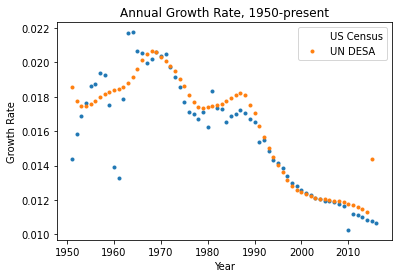

In [19]:
plot_alpha()

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1970.

We can model the decline by fitting a line to this data and extrapolating into the future.
Here's a function that takes a time stamp and computes a line that roughly fits the growth rates since 1970.

In [20]:
def alpha_func(t):
    intercept = 0.02
    slope = -0.00021
    return intercept + slope * (t - 1970)

To see what it looks like, I'll create an array of time stamps from 1960 to 2020 and use `alpha_func` to compute the corresponding growth rates.

In [21]:
t_array = linspace(1960, 2020, 5)
alpha_array = alpha_func(t_array)

To see what it looks like, I'll create a `Series` and compare it to the known data:

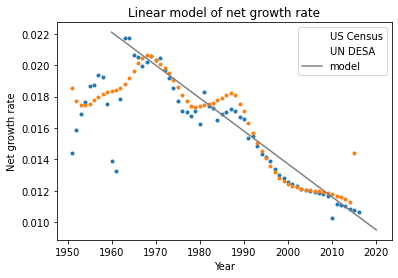

In [22]:
linear_alpha = pd.Series(data=alpha_array,index=t_array)

plot_alpha()
linear_alpha.plot(label='model', legend=True,color='gray',
                  ylabel='Net growth rate', xlabel='Year',
                  title='Linear model of net growth rate');

---

## Exercises

### Exercise 1

If you don't like the `slope` and `intercept` that are shown, feel free to adjust them.

Now, as an exercise, you can use this function to project world population until 2100.

1. Create a system `dictionary` object that includes `alpha_func` as a system parameter.

2. Define a growth function that uses `alpha_func` to compute the net growth rate at the given time `t`.

3. Run a simulation from 1960 to 2100 with your growth function, and plot the results.

4. Compare your projections with those from the US Census and UN.

In [ ]:
# Create a `System` object that includes `alpha_func` as a system parameter.
# Set the start and end dates, and starting population p_0
t_0 = 1960
p_0 = census[t_0]
t_end = 2100

system = dict(t_0 = t_0,
                p_0 = p_0,
                t_end = 2100, alpha = 0,
               alpha_func = alpha_func)

In [ ]:
# Define a growth function that uses `alpha_func` to compute 
# the net growth rate at the given time `t`.
def alpha_func(t):
    intercept = 0.02
    slope = -0.00021
    return intercept + slope * (t - 1970)

def run_simulation(system, growth_func):
    results = pd.Series([],dtype=object)
    results[system['t_0']] = system['p_0']
    
    for t in range(system['t_0'], system['t_end']):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

def growth_func_changing(t, pop, system):
    # defines growth rate for given year
    system['alpha'] = alpha_func(t)
    # returns net growth
    return system['alpha'] * pop

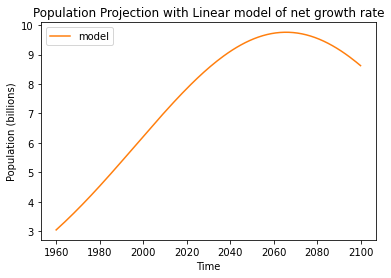

In [ ]:
# Run a simulation from 1960 to 2100 with your growth function, 
# and plot the results.
results = run_simulation(system,growth_func_changing)

# `results` is a Series, so we can use the Series function `plot()`
results.plot(label='model',color='C1',legend=True,
             ylabel='Population (billions)', xlabel='Time',
             title='Population Projection with Linear model of net growth rate');

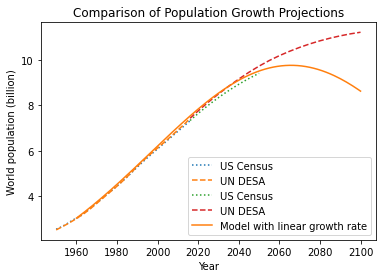

In [ ]:
# Compare your projections with those from the US Census and UN.
def plot_estimates():
    census.plot(style=':', label='US Census',legend=True)
    un.plot(style='--', label='UN DESA', xlabel='Year', 
             ylabel='World population (billion)',
           legend=True)
    
plot_estimates()
plot_projections(table3)
results.plot(label='Model with linear growth rate',color='C1',
             legend=True,
            title='Comparison of Population Growth Projections');